In [2]:
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function
import copy

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]


num_samples = 4  # Number of samples you want to generate
dim = 2
alpha = 5

# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
mu = np.zeros(dim)
identity_matrix = np.eye(dim)
cov_matrix = identity_matrix
points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

point_number = 1 # Point you want to test
point_index = 0 # Index you want to test

In [7]:
# Function af x
sum = Loss_function_prior_fast(points,Y,dim,alpha)
print(sum)

# Function af x+epsilon
point_e = copy.deepcopy(points)
point_e[point_number][point_index] += 0.001 # Update the point[1][0]
sum_e = Loss_function_prior_fast(point_e,Y,dim,alpha)
print(sum_e)

# Gradient af x
gradient = Gradient_function_prior_fast(point_number,dim,Y,points,alpha)[point_index]
print(gradient)

# Error
(sum_e-sum)/0.001-(gradient)

-16.403179752103267
-16.403849999150786
-0.6692112008251411


-0.00103584669458201

In [8]:
hist = np.zeros(1000) # Number of test
for n in range(1000):
    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
    
    sum = Loss_function_prior_fast(points,Y,dim,alpha) # Function af x

    point_e = copy.deepcopy(points)
    point_e[point_number][point_index] += 0.001 # Update the point[1][0]
    sum_e = Loss_function_prior_fast(point_e,Y,dim,alpha) # Function af x+epsilon
    
    gradient = Gradient_function_prior_fast(point_number,dim,Y,points,alpha)[point_index] # Gradient af x
            
    hist[n] = (sum_e-sum)/0.001-(gradient) # Error

(array([  1.,   0.,   3.,   2.,   1.,   0.,   3.,   4.,   5.,   7.,   6.,
         12.,   8.,  21.,  24.,  23.,  28.,  45.,  55.,  43.,  49.,  64.,
         67.,  63.,  65.,  73.,  70.,  43.,  74., 141.]),
 array([-0.00647661, -0.00621185, -0.00594709, -0.00568233, -0.00541757,
        -0.00515281, -0.00488805, -0.00462329, -0.00435853, -0.00409377,
        -0.00382901, -0.00356425, -0.00329949, -0.00303473, -0.00276997,
        -0.00250521, -0.00224045, -0.00197569, -0.00171093, -0.00144617,
        -0.0011814 , -0.00091664, -0.00065188, -0.00038712, -0.00012236,
         0.0001424 ,  0.00040716,  0.00067192,  0.00093668,  0.00120144,
         0.0014662 ]),
 <BarContainer object of 30 artists>)

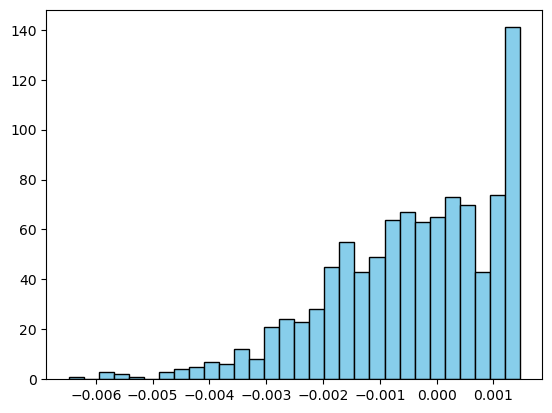

In [9]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')